In [1]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(tidyverse)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.4.2     v purrr   0.2.5
v readr   1.1.1     v stringr 1.3.1
v tibble  1.4.2     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [8]:
# CBML actual: Código de ubicación del predio en la ciudad. 
# Consta de 11 dígitos distribuidos en: Comuna (2 dígitos), 
# Barrio (2 dígitos), Manzana (3dígitos) y lote (4 dígitos). 


setwd("../Datasets/")
getwd()
files_names= list.files(pattern="*.csv")
df <- do.call(rbind, lapply(files_names, function(x) read.csv(x, stringsAsFactors = FALSE)))

df<- df %>% 
    mutate_at(vars(starts_with("RADIC")),list(as.character)) %>%
    mutate_at(vars(starts_with("OBJECT")),list(as.character))

[1] "/Users/sebastianparra/Codigos/Universidad/TAE/accidentes_medellin/Datasets"

In [18]:
## Limpiando los datos
df <- data.frame(apply(df,2,function(x) gsub("Ã‰",'E',x)))#e tilde mayus
df <- data.frame(apply(df,2,function(x) gsub("Ã",'A',x)))
df <- data.frame(apply(df,2,function(x) gsub("Ã",'i',x)))
df <- data.frame(apply(df,2,function(x) gsub("i³",'o',x)))
df <- data.frame(apply(df,2,function(x) gsub("i±",'n',x)))
df <- data.frame(apply(df,2,function(x) gsub("i©",'e',x)))
df <- data.frame(apply(df,2,function(x) gsub("iº",'u',x)))
df <- data.frame(apply(df,2,function(x) gsub("i‘",'N',x)))

In [19]:
df2 <- df[df$TIPO_GEOCOD!="ZONA RURAL",]
df2[df2$GRAVEDAD == "CON MUERTO",]$GRAVEDAD <- "MUERTO"
df2[df2$CLASE == levels(df2$CLASE)[5] | df2$CLASE == levels(df2$CLASE)[3] ,]$CLASE <- "Caida Ocupante"

In [20]:
clase_c<-count(df2, CLASE)
clase_c[order(-clase_c$n),]
count(df2, GRAVEDAD)

CLASE,n
<fct>,<int>
Choque,141305
Otro,22017
Atropello,20667
Caida Ocupante,18518
Volcamiento,6613
Incendio,24
Caída Ocupante,14
,6
Choque,3


GRAVEDAD,n
<fct>,<int>
HERIDO,114022
MUERTO,1239
SOLO DAÑOS,93907


In [24]:
aggregate(RADICADO ~ GRAVEDAD, data = df, FUN = length)
aggregate(CBML ~ GRAVEDAD, data = df, FUN = length)

GRAVEDAD,RADICADO
<fct>,<int>
CON MUERTO,73
HERIDO,114200
MUERTO,1175
SOLO DAÑOS,93973


GRAVEDAD,CBML
<fct>,<int>
CON MUERTO,73
HERIDO,114200
MUERTO,1180
SOLO DAÑOS,93973


## Graficas y relación de variables:
Inicialente se consideran las posibles relaciones entre ciertas Comunas y la frecuencia, gravedad y tipo de accidentes.

### Gravedad y comunas

In [25]:
# EN su mayoria las comunas con menos de 4 accidentes son tabulaciones erroneas de eun barrio
comunas <- count(df2, COMUNA)
head(comunas[order(-comunas$n),],25)
comunas_relevantes <- head(comunas[order(-comunas$n),][1], 20) 
# Para las comunas relevantes se tienen las 16 de medellin, y las 24 primeras corregimientos 
# y otros lugares menos relevantes.
# Se eligen las 16 comunas de medellín y los 4 corregimientos de mayor tamaño.

COMUNA,n
<fct>,<int>
La Candelaria,43715
Laureles Estadio,23850
Castilla,21208
El Poblado,17148
Guayabal,15217
Belén,13933
Robledo,13910
Aranjuez,12425
Buenos Aires,7791


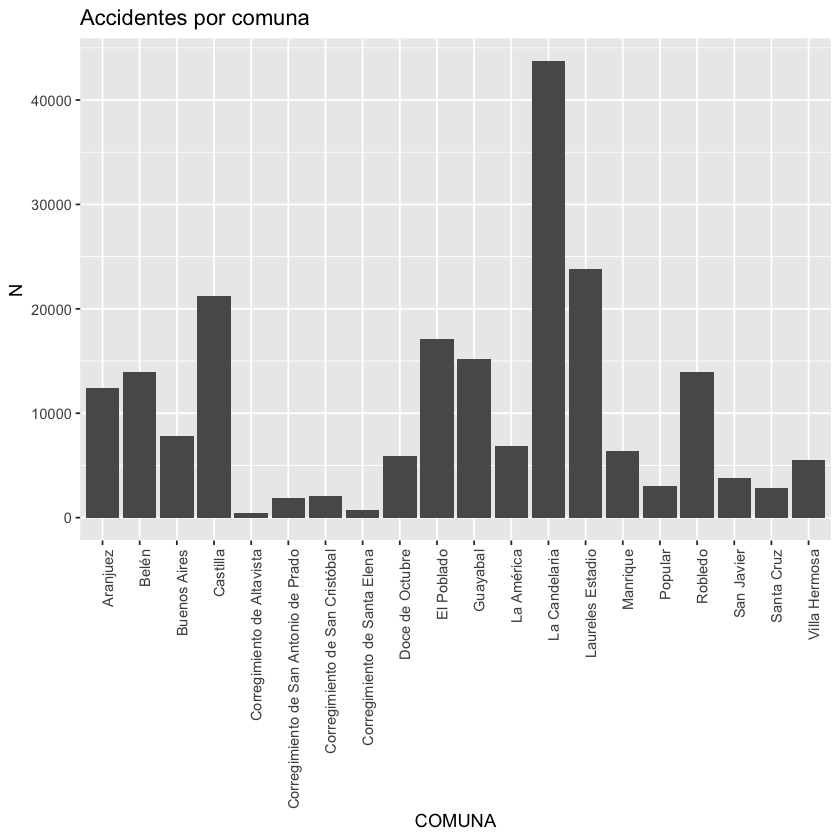

In [27]:
comunas_relev<- unlist(split(comunas_relevantes, seq(nrow(comunas_relevantes))), use.names = FALSE) ##get the names we want
com <- aggregate(RADICADO ~ COMUNA, data = df2[df2$COMUNA %in% comunas_relev , ], FUN = length) ##genera tabla para graficar (cuenta radicados agrupados por gravedad y comuna)

ggplot(data=com, aes(x=COMUNA, y=RADICADO)) +
    geom_bar(stat="identity")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Accidentes por comuna", y = "N")

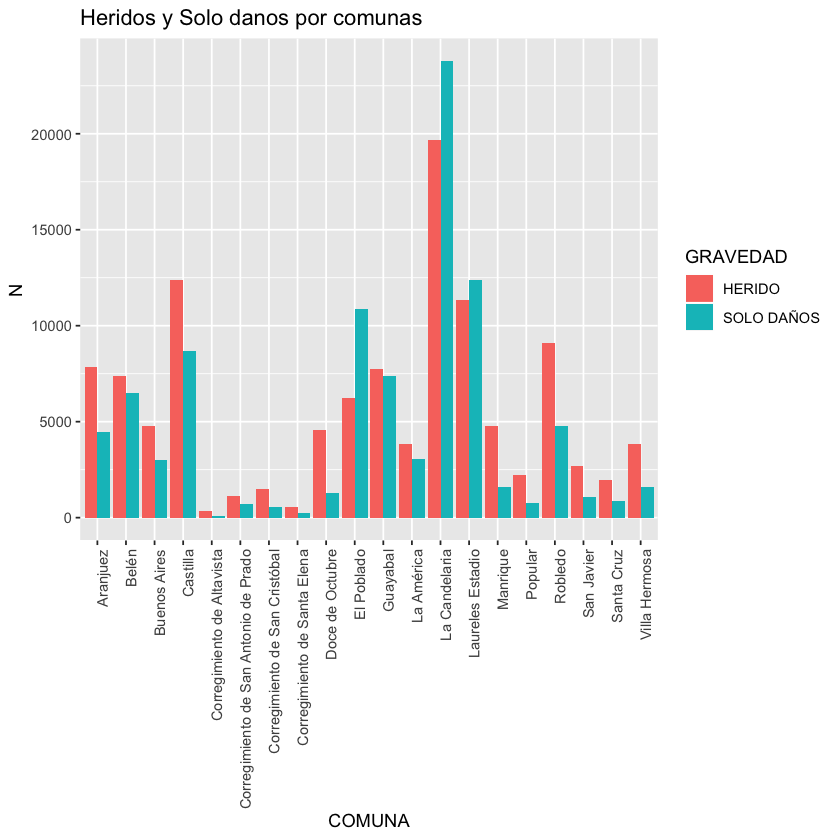

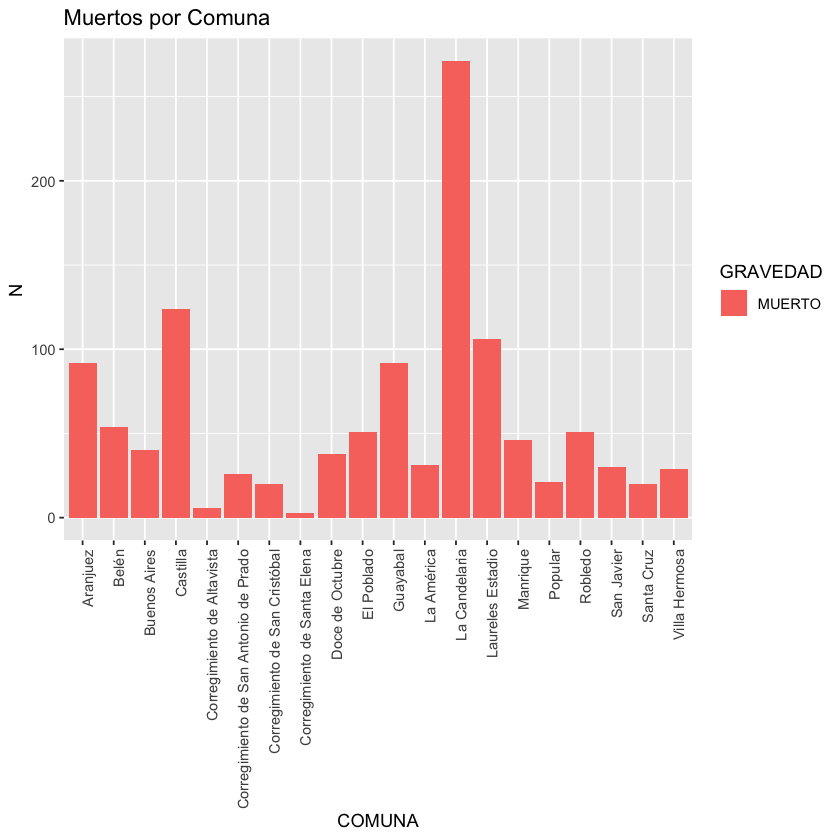

In [28]:
##Conteo a traves de Radicado o ID son practicament equivalentes


com_grav <- aggregate(RADICADO ~ GRAVEDAD + COMUNA, data = df2[df2$COMUNA %in% comunas_relev , ], FUN = length) ##genera tabla para graficar (cuenta radicados agrupados por gravedad y comuna)


ggplot(data=com_grav[com_grav$GRAVEDAD != "MUERTO",], aes(x=COMUNA, y=RADICADO, fill=GRAVEDAD)) +
    geom_bar(stat="identity", position=position_dodge())+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(title="Heridos y Solo danos por comunas", y = "N")

ggplot(data=com_grav[com_grav$GRAVEDAD == "MUERTO",], aes(x=COMUNA, y=RADICADO, fill=GRAVEDAD)) +
    geom_bar(stat="identity")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  labs(title="Muertos por Comuna", y = "N")

### Grafico de frecuencias relativas para gravedad

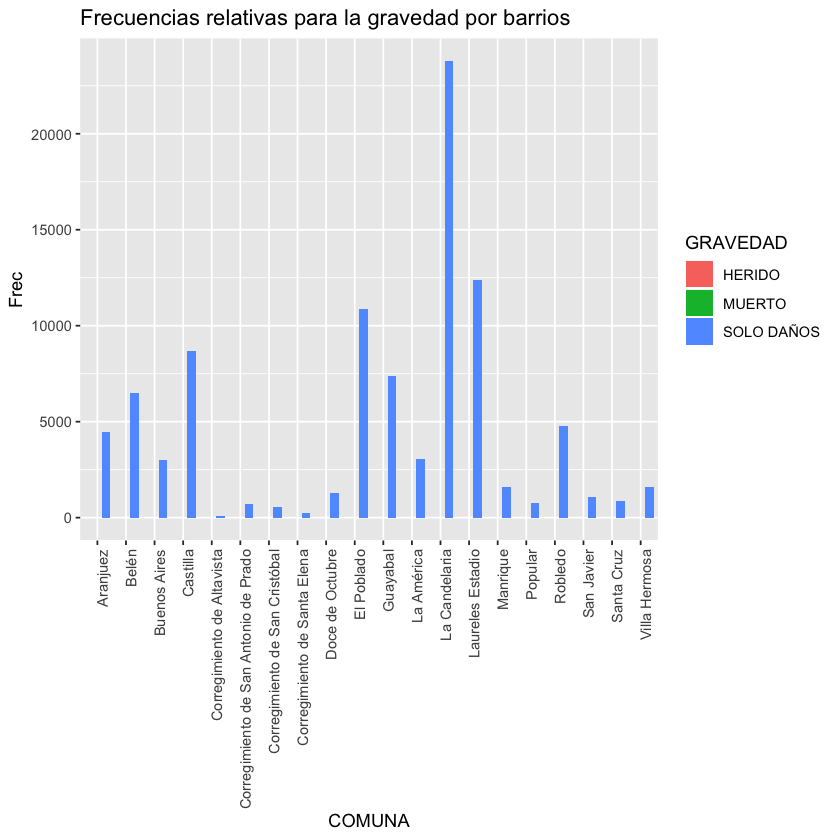

In [29]:
frec_grav <- com_grav
frec_grav[frec_grav$GRAVEDAD == "HERIDO", ]$RADICADO <- frec_grav[frec_grav$GRAVEDAD == "HERIDO", ]$RADICADO/sum(frec_grav[frec_grav$GRAVEDAD == "HERIDO", ]$RADICADO)

frec_grav[frec_grav$GRAVEDAD == "MUERTO", ]$RADICADO <- frec_grav[frec_grav$GRAVEDAD == "MUERTO", ]$RADICADO/sum(frec_grav[frec_grav$GRAVEDAD == "MUERTO", ]$RADICADO)

frec_grav[frec_grav$GRAVEDAD == "SOLO DANOS", ]$RADICADO <- frec_grav[frec_grav$GRAVEDAD == "SOLO DANOS", ]$RADICADO/sum(frec_grav[frec_grav$GRAVEDAD == "SOLO DANOS", ]$RADICADO)

ggplot(data=frec_grav, aes(x=COMUNA, y=RADICADO, fill=GRAVEDAD)) +
    geom_bar(stat="identity", position=position_dodge())+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(title="Frecuencias relativas para la gravedad por barrios", y = "Frec")

Este grafico nos indica que para algunas comunas las proporciones de Heridos, muertos y solo daños son diferentes,lo que indica características distintas que pueden aumentar los riesgos de sufrir lesiones dependiendo de la comuna.

Se denota que para los 4 corregimientos analizados en general los accidentes mortales tienen una fecuencia absoluta mayor que los accidentes de otra gravedad.



### Tipo accidente y comunas/barrios

Para los tipos de accidentes se eligen los 5 tipos de mayor frecuencia en los accidentes.
Choque	141305			
Otro	22017			
Atropello	20667			
Caida Ocupante	18532			
Volcamiento 6613

Se descartan los demás cuya frecuencia era inferior a 25.

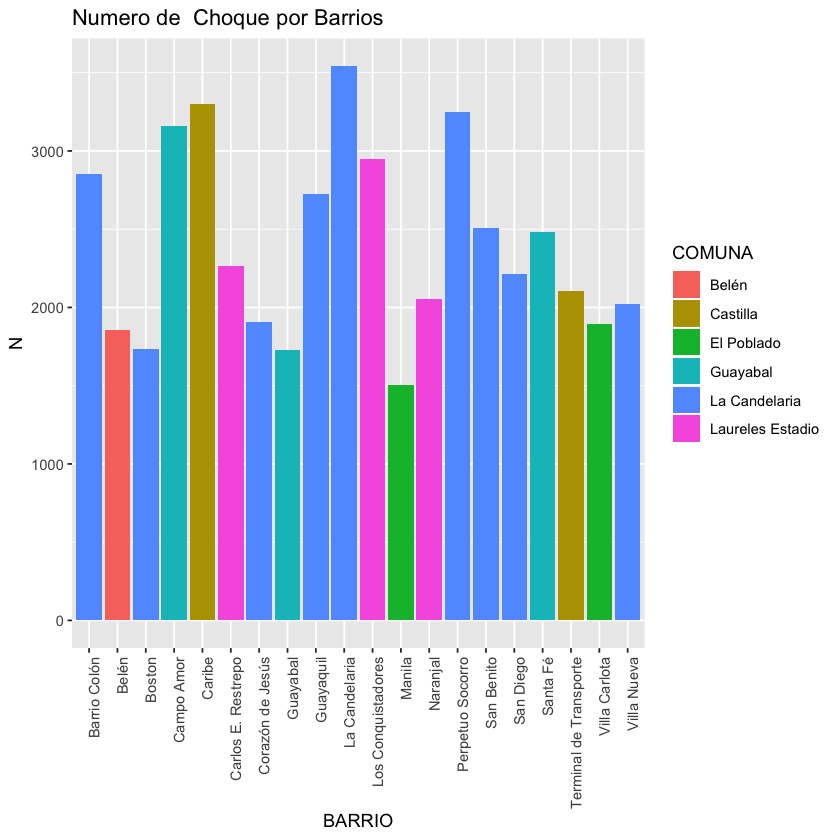

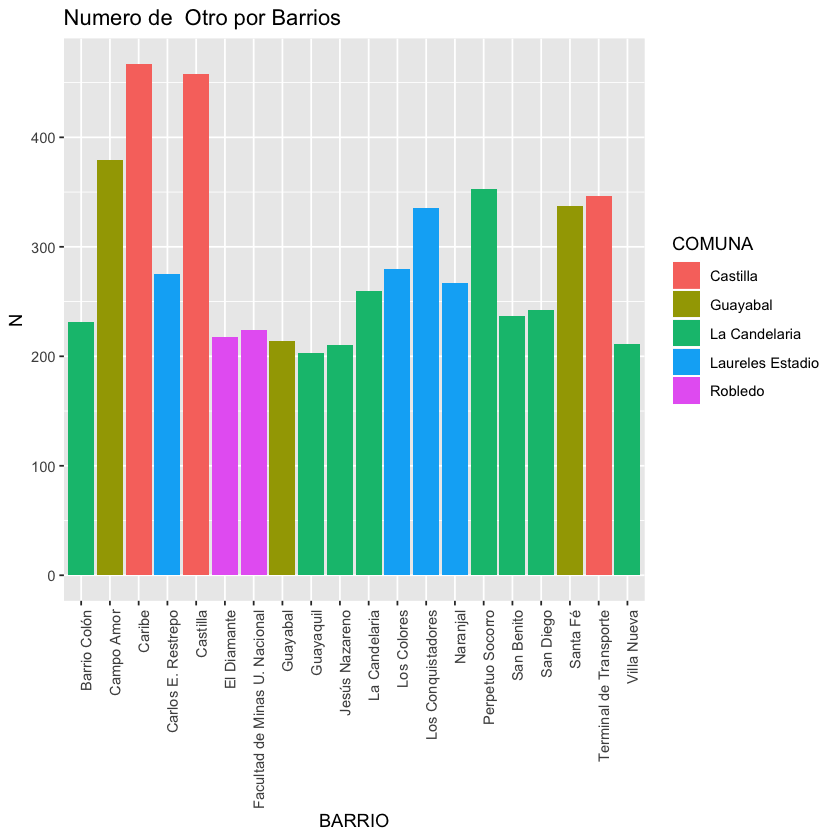

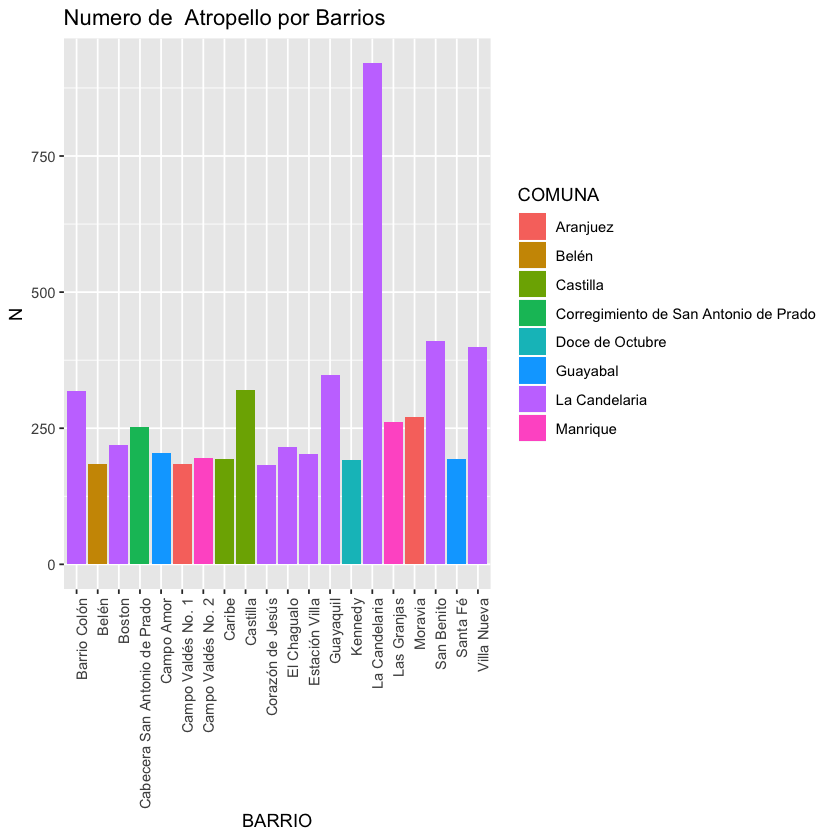

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]


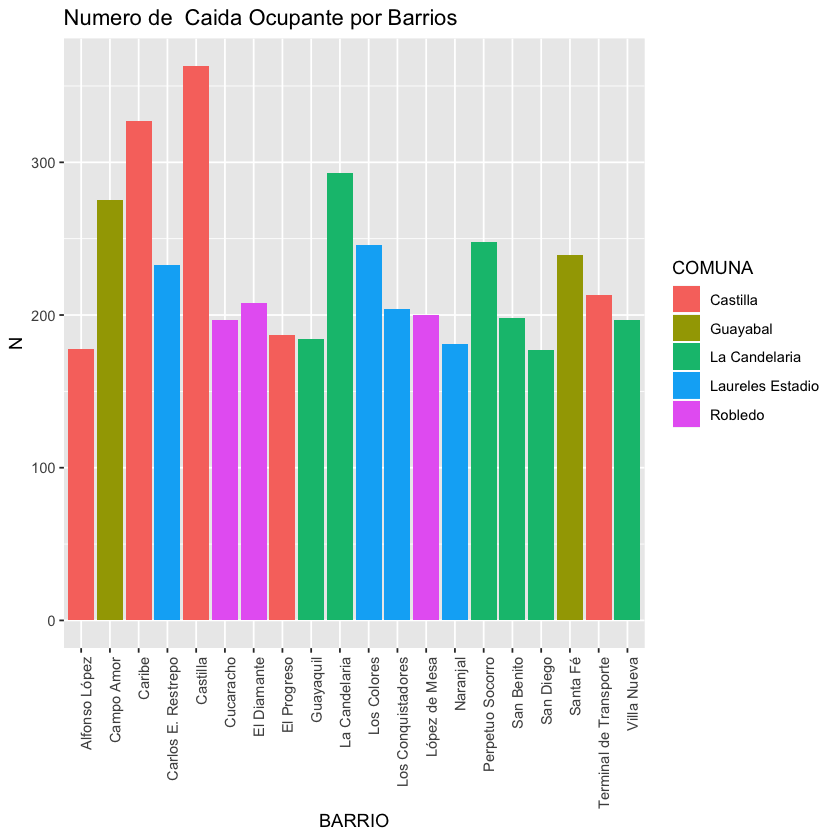

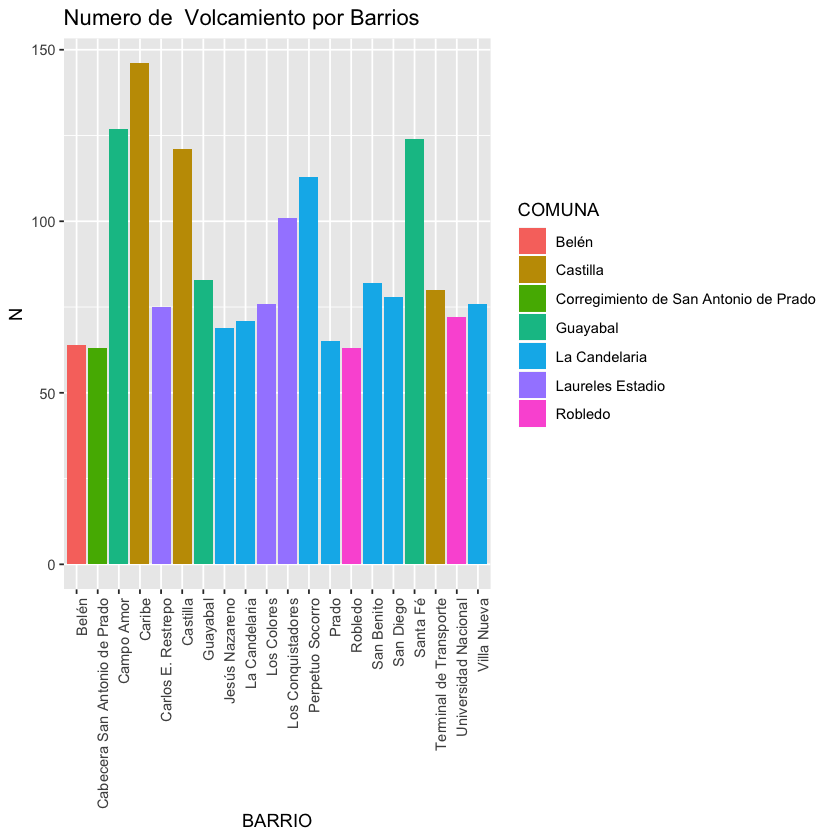

In [30]:
clase_c<-count(df2, CLASE)
clase_relev <- head(clase_c[order(-clase_c$n),], 5)[1]
clase_relev<- unlist(split(clase_relev, seq(nrow(clase_relev))), use.names = FALSE) ##get the type of accidents that kinda matter

com_acc <- aggregate(RADICADO ~ CLASE + BARRIO + COMUNA, data = df2[df2$CLASE %in% clase_relev , ], FUN = length) 


graphxClass <- function(clase, cl_df = com_acc){
  cl_df <- cl_df[cl_df$CLASE== clase,]
  cl_df2 <- head(cl_df[order(-cl_df$RADICADO),], 20)
  ggplot(data=cl_df2, aes(x=BARRIO, y=RADICADO, fill=COMUNA)) +
    geom_bar(stat="identity", position=position_dodge())+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(title=paste("Numero de ",clase, "por Barrios"), y = "N")
  
}

lapply(clase_relev, graphxClass)

### Graficos para barrios
De momento lo omito, se espera que pase lo mismo que con el de comunas.

In [32]:
barrios <- count(df2, BARRIO) #EN su mayoria las comunas con menos de 4 accidentes son tabulaciones erroneas d eun barrio
#barrios[order(-barrios$n),] AQUI PARA VER LOS BARRIOS
barrios_relevantes <- head(barrios[order(-barrios$n),][1], 20) 
#Para las comunas relevantes se tienen las 16 de medellin, y las 24 primeras corregimientos y otros lugares menos relevantes.
#Se eligen las 16 comunas de medellín y los 4 corregimientos de mayor tamaño.
Barr_grav <- aggregate(RADICADO ~ BARRIO + COMUNA + GRAVEDAD, data = df2, FUN = length) ##genera tabla para graficar (cuenta radicados agrupados por gravedad y comuna)


## Graficos unidades de tiempo

### Frecuencia por dias

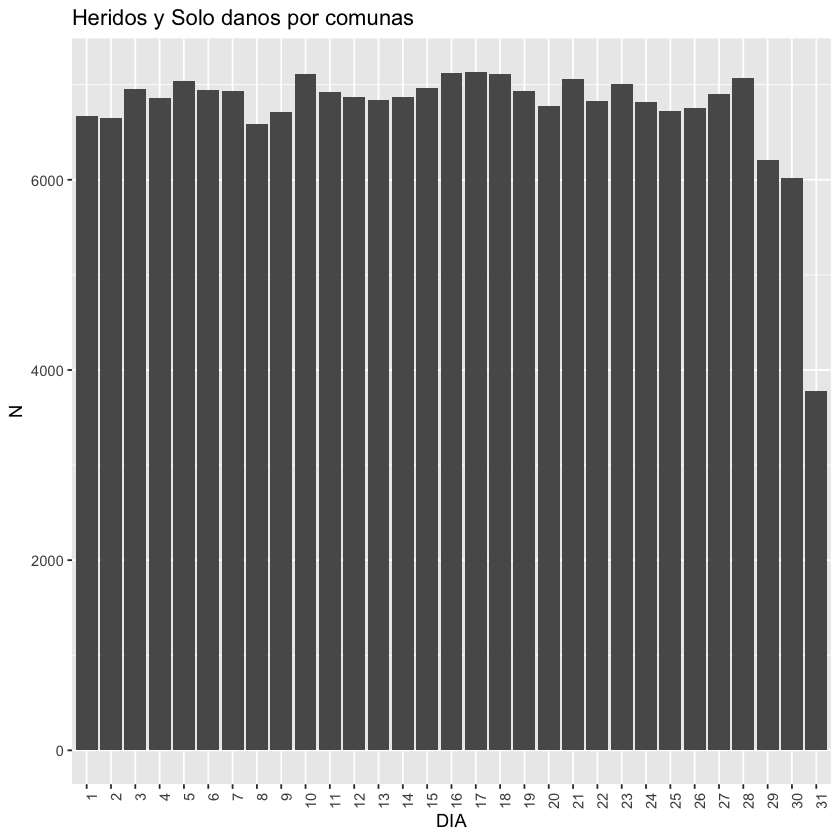

In [33]:
dias <- aggregate(RADICADO ~ DIA, data = df2, FUN = length)
dias_sem <- aggregate(RADICADO ~ DIA_NOMBRE, data = df2, FUN = length)

meses <- aggregate(RADICADO ~ MES, data = df2, FUN = length)

ggplot(data=dias, aes(x=DIA, y=RADICADO)) +
    geom_bar(stat="identity")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(title="Heridos y Solo danos por comunas", y = "N")

El número de accidentes a lo largo de un mes no presenta variaciones.

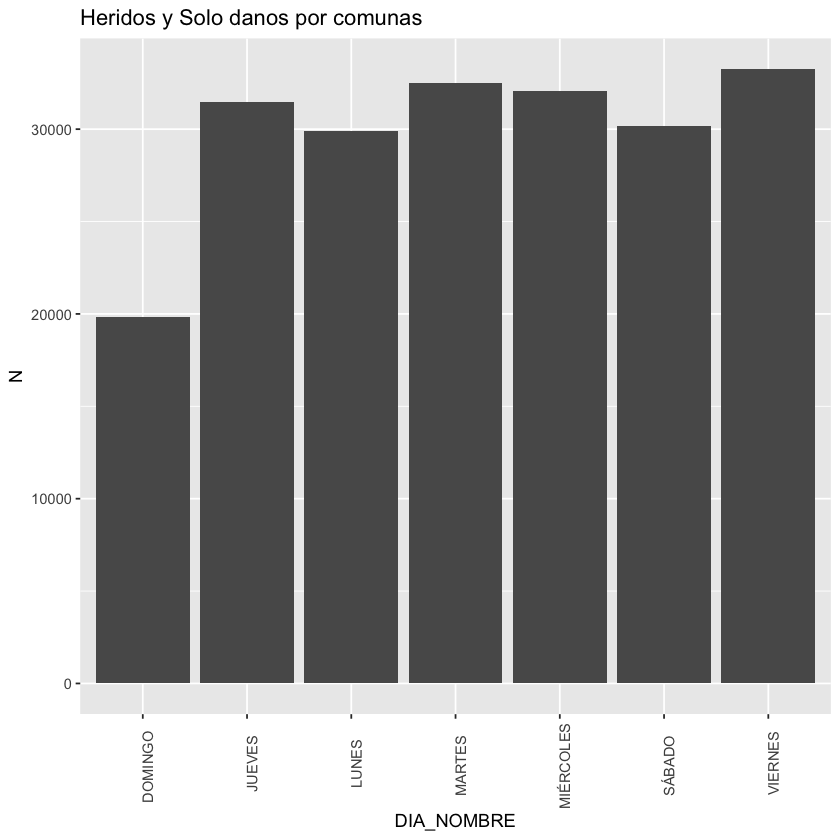

In [34]:
ggplot(data=dias_sem, aes(x=DIA_NOMBRE, y=RADICADO)) +
    geom_bar(stat="identity")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(title="Heridos y Solo danos por comunas", y = "N")

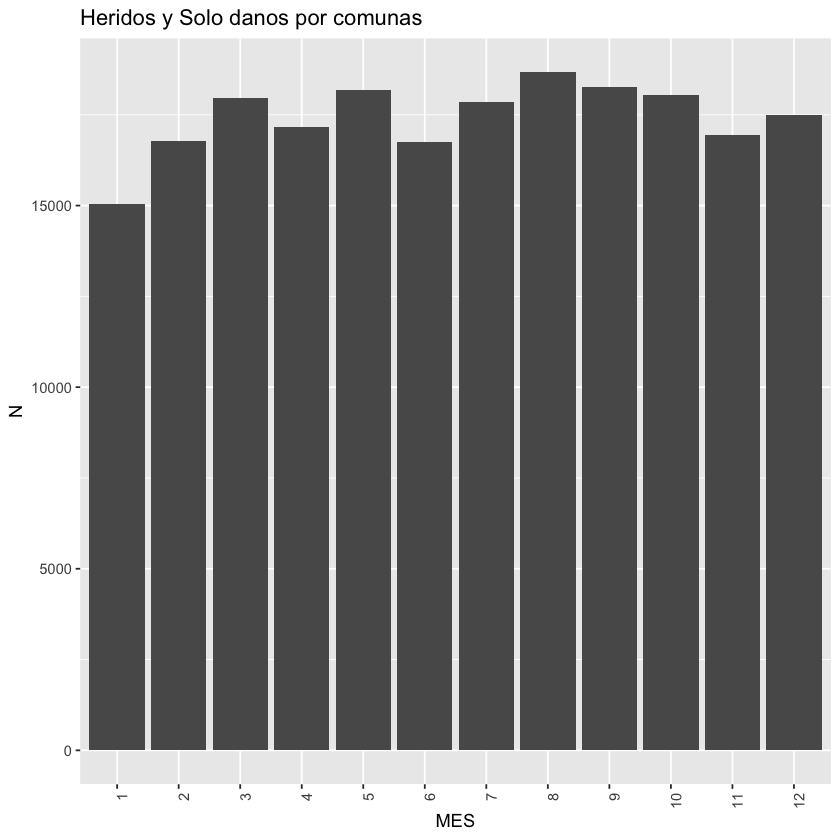

In [35]:
ggplot(data=meses, aes(x=MES, y=RADICADO)) +
    geom_bar(stat="identity")+
    theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  labs(title="Heridos y Solo danos por comunas", y = "N")